<a href="https://colab.research.google.com/github/yakuzadave/seer-colab-notebooks/blob/main/Intro_To_Dask_For_Faster_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<center><h1> <font color="red">Introduction to Dask</font></h1></center>

---

In [2]:
#@title
%%html
<!DOCTYPE html>
<html lang="en">
  <head> </head>
  <body>
<script src="https://bot.voiceatlas.mysmce.com/v1/chatlas.js"></script>
<app-chatlas
	atlas-id="f759a188-f8bb-46bb-9046-3b1b961bd6aa"
	widget-background-color="#3f51b5ff"
	widget-text-color="#ffffffff"
	widget-title="Chatlas">
</app-chatlas>
  </body>
</html>

## <font color="red">Reference Document</font>

- <a href="https://docs.dask.org/en/latest/why.html">Why Dask?</a>
- <a href="https://github.com/dask/dask-tutorial">dask-tutorial</a>
- <a href="https://www.manning.com/books/data-science-with-python-and-dask">Data Science with Python and Dask</a>
- <a href="https://www.manifold.ai/dask-and-machine-learning-preprocessing-tutorial">Dask and Machine Learning: Preprocessing Tutorial</a>
- <a href="https://carpentries-incubator.github.io/lesson-parallel-python/aio/index.html">Parallel Programming in Python</a>
- <a href="https://www.youtube.com/watch?v=uGy5gT2vLdI&feature=youtu.be"> Working with the Python DASK library (video)</a>
- <a href="https://www.youtube.com/watch?v=t_GRK4L-bnw&feature=youtu.be">Who uses Dask (video)</a>

![fig_dask](https://miro.medium.com/max/1000/1*D6mSsdWECFLn6wJne4VTjg.png)


# <font color="red"> What is Dask?</font>

- A flexible library for parallel computing in Python that makes it easy to build intuitive workflows for ingesting and analyzing large, distributed datasets. 
- A native parallel analytics tool designed to integrate seamlessly with Numpy, Pandas, and Scikit-Learn. 
- An out-of-core (data is read into memory from disk on an as-needed basis) parallelization library that seamlessly integrates with existing NumPy and Pandas data structures to address the following:
     * **The available dataset does not fit in memory of a single machine.**
     * **The data processing task is time consuming and needs to be scaled and sped up.**
- Orchestrates parallel threads or processes for us and help speed up processing times.
   - Works by distributing larger computations and breaking them down into smaller computations through a task scheduler and task workers.

Dask consists of several different components and APIs, which can be categorized into three layers: the scheduler, low-level APIs, and high-level APIs.

- Dask provides a few high-level constructs called Dask Bags, Dask DataFrames, and Dask Arrays. They provide an easy-to-use interface to parallelize many of the typical data transformations in Machine Learning (ML) workflows. 
- Dask allows the creation of highly customized job execution graphs by using their extensive Python API (e.g., `dask.delayed`) and integration with existing data structures.


![fig_layers](http://bicortex.com/bicortex/wp-content/post_content//2019/06/Dask_APIs_Architecture.png)
Image Source: bicortex.com


The diagram below describes the steps Dask takes to manipulate data.

- The operation is broken down into a sequence of operations on smaller partitions of our data (without having to read the whole dataset into memory).
- Dask reads each partition as it is needed and computes the intermediate results. 
- The intermediate results are aggregated into the final result.
- Dask handles all of that sequencing internally for us. 
- On a single machine, Dask can use threads or processors to parallelize these operations. 


**Advantages of Using Dask**

- Fully implemented in Python and natively scales NumPy, Pandas, and scikit-learn.
- Can be used effectively to work with both medium datasets on a single machine and large datasets on a cluster.
- Can be used as a general framework for parallelizing most Python objects.
- Has a very low configuration and maintenance overhead.



>Dask provides high-level Array, Bag, and DataFrame collections that mimic NumPy, lists, and Pandas but can operate in parallel on datasets that don’t fit into main memory. Dask’s high-level collections are alternatives to NumPy and Pandas for large datasets.

**Recall on Processes and Threads**

- A process is an execution of a program. 
- A thread is a single execution sequence within the process.
- A process can contain multiple threads.
- Threads are used for small tasks, whereas processes are used for more ‘heavyweight’ tasks. 

![threads](https://pediaa.com/wp-content/uploads/2018/07/Difference-Between-Process-and-Thread-Comparison-Summary-684x1024.jpg)


**The regular Python can only run one thread at the time.**

>Dask offers an easy and consistent way to parallelize computations that scales from a single laptop to clusters with thousands of cores. It's based on a task scheduler that distributes Python function calls across multiple threads, processes or cluster nodes.

### Import Modules

Uncomment the next two cells if in Google Colab.

In [3]:
!python -m pip install dask[dataframe] --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2022.12.1
    Uninstalling dask-2022.12.1:
      Successfully uninstalled dask-2022.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.12.1 requires dask==2022.12.1, but you have dask 2023.3.1 which is incompatible.


In [4]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import dask
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar 

In [7]:
print(f"Numpy version:  {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Dask   version: {dask.__version__}")

Numpy version:  1.22.4
Pandas version: 1.4.4
Dask   version: 2023.3.1


In [8]:
from memory_profiler import memory_usage
import memory_profiler
%load_ext memory_profiler

**We may want to first determine the system information.**

In [9]:
import math
def convert_size(size):
    """
      Convert from KB to another unit.
    """
    if (size == 0):
       return '0B'
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size,1024)))
    p = math.pow(1024,i)
    s = round(size/p,2)
    return " ".join([str(s),size_name[i]])

In [10]:
import platform
import psutil

print("="*20, "System Information", "="*20)
uname = platform.uname()
print(f"           System: {uname.system}")
print(f"        Node Name: {uname.node}")
print(f"          Release: {uname.release}")
print(f"          Version: {uname.version}")
print(f"          Machine: {uname.machine}")
print(f"        Processor: {uname.processor}")
print("="*20, "CPU Information", "="*20)
cpufreq = psutil.cpu_freq()
print("# logical cores = # physical cores times # threads ")
print("                    that can run on each physical core.")
print(f"   Physical cores: {psutil.cpu_count(logical=False)}")
print(f"    Logical cores: {psutil.cpu_count(logical=True)}")
print(f"Current frequency: {psutil.cpu_freq().current}")
print(f"    Min frequency: {psutil.cpu_freq().min}")
print(f"    Max frequency: {psutil.cpu_freq().max}")
print("="*20, "Memory Information", "="*20)
svmem = psutil.virtual_memory()
print(f"     Total memory: {convert_size(svmem.total)}")
print(f" Available memory: {convert_size(svmem.available)}")
svmem = psutil.virtual_memory()
print("="*60)

==================== System Information ====================
           System: Linux
        Node Name: 8355f7a2275d
          Release: 5.10.147+
          Version: #1 SMP Sat Dec 10 16:00:40 UTC 2022
          Machine: x86_64
        Processor: x86_64
==================== CPU Information ====================
# logical cores = # physical cores times # threads 
                    that can run on each physical core.
   Physical cores: 1
    Logical cores: 2
Current frequency: 2200.204
    Min frequency: 0.0
    Max frequency: 0.0
==================== Memory Information ====================
     Total memory: 12.68 GB
 Available memory: 11.42 GB


### Setting Up the Progress Bar

- You can use Dask’s built-in Progress Bar he progress on any `get()` or `compute()` calls. 
- Here we will use the global registration where the Progress Bar will be displayed for all computations.

In [11]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

# <font color="red"> Parallelize Code with `dask.delayed`</font>

- A simple way to parallelize the code.
- Allows users to delay function calls into a task graph with dependencies.
- Systems like `dask.dataframe` are built with `dask.delayed`.

**Simple Example**

Consider the following functions:

In [12]:
import time

def increment(x):
    time.sleep(1.0)
    return x + 1

def double(x):
    time.sleep(1.0)
    return 2 * x

def add(x, y):
    time.sleep(1.0)
    return x + y

In [13]:
%%time

x = increment(1)
y = increment(2)
z = add(x, y)

CPU times: user 15 ms, sys: 4.79 ms, total: 19.8 ms
Wall time: 3 s


- We use the `dask.delayed` decorator to parallelize the functions `increment` and `add`.
- By decorating the functions, we record what we want to compute as tasks into graphs that will be run later on parallel hardware.

In [14]:
xd = dask.delayed(increment)(1)
yd = dask.delayed(increment)(2)
zd = dask.delayed(add)(xd, yd)
zd

Delayed('add-29d62514-17ef-49fd-8a53-b3cae21aca67')

- When we call the delayed version by passing the arguments, exactly as before, but the original function isn't actually called yet.
- A delayed object is made, which keeps track of the function to call and the arguments to pass to it.
- We use the `visualize` method (relies on the `graphviz` package) that provide a visual representation of the operations being performed.

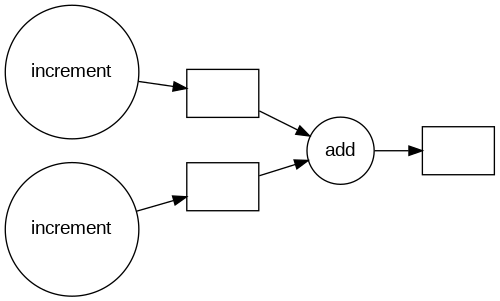

In [15]:
zd.visualize(rankdir='LR')

- Note that we have not physically calculated **total** yet.
- We need to apply the `compute` method to get the answer. 
- <font color="red">It is only here that the data are loaded into memory for calculations</font>.
- The calculations are done through using a local thread pool.

In [16]:
%%time
dask.compute(zd)

[########################################] | 100% Completed | 2.04 s
CPU times: user 360 ms, sys: 49.6 ms, total: 410 ms
Wall time: 2.43 s


(5,)

**Using `delayed` in Loops**

Consider the sequential code with two for-loops:

In [17]:
%%time

n = 10
data = [i+1 for i in range(n)]

out = list()
for x in data:
    y = increment(x)
    z = double(y)
    out.append(z)
    
total = 0
for z in out:
    total = add(total, z)

total

CPU times: user 171 ms, sys: 18.3 ms, total: 189 ms
Wall time: 30 s


130

We can parallelize the above using the `delayed` decorator:

In [19]:
n = 10
data = [i+1 for i in range(n)]

out = list()
for x in data:
    y = dask.delayed(increment)(x)
    z = dask.delayed(double)(y)
    out.append(z)
    
totald = 0
for z in out:
    totald = dask.delayed(add)(totald, z)

totald

Delayed('add-259ac1ff-a91e-46dc-8363-61ae6b0d6ebd')

We can also get the visual representation through a task graph.

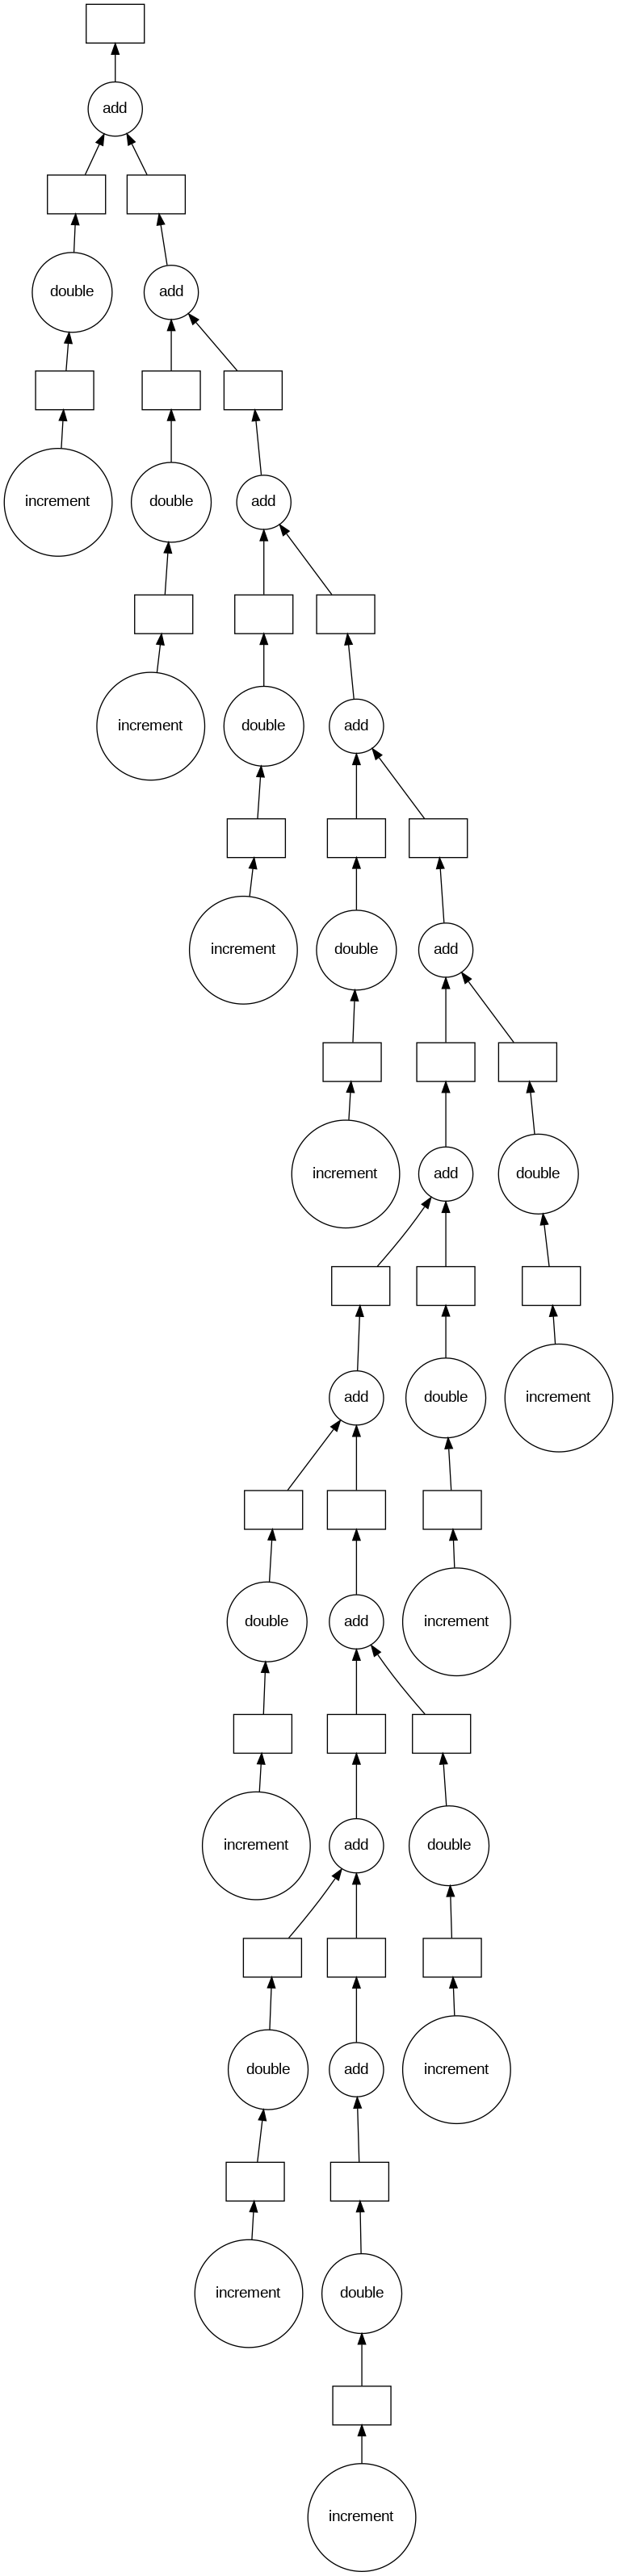

In [20]:
totald.visualize()

In [21]:
%%time
dask.compute(totald)

[########################################] | 100% Completed | 16.06 s
CPU times: user 496 ms, sys: 52.5 ms, total: 549 ms
Wall time: 16.1 s


(130,)

### Exercise 1

Use the `delayed` decorator to parallelize the code below:

In [22]:
def is_odd(x):
    return x%2

In [23]:
%%time

n = 10
data = [i+1 for i in range(n)]

results = list()

for x in data:
    if is_odd(x):
        y = double(x)
    else:
        y = increment(x)
    results.append(y)

total = sum(results)
print(total)

85
CPU times: user 61.4 ms, sys: 7.34 ms, total: 68.8 ms
Wall time: 10 s


<p>
<p>

<details><summary><b>Click here to access the solution</b></summary>
<p>


```python
n = 10
data = [i+1 for i in range(n)]

results = list()

for x in data:
    if is_odd(x):
        y = dask.delayed(double)(x)
    else:
        y = dask.delayed(increment)(x)
    results.append(y)

total = dask.delayed(sum)(results)
```

</p>
</details>

### Example: Palindromic Words

- A palindromic word is a word which characters read the same backward as forward. 
- Some examples of palindromes are `redivider`, `deified`, `civic`, `radar`, `level`, `rotor`, `kayak`, `reviver`, `racecar`, `madam`, and `refer`.

We want to find the number of palindromes from a list of words.

In [24]:
def is_palindrome(s):
    return s.upper() == s.upper()[::-1]

In [25]:
list_words = [
    'complete', 'abstraction', 'from', 'compass', 'sights', 'sounds', 
    'Human', 'shapes', 'interferences', 'troubles', 'joys', 'were', 
    'they', 'were', 'there', "man", 'seemed', 'shaded', 'hemisphere', 
    'globe', 'sentient', 'being', 'save', 'himself', "rather", 
    "Abba", "Aibohphobia", "Bib", "Bob", "Civic", "Deified", 
    "Detartrated", "Dewed", "Eve", "Hannah", "Kayak", "Level", 
    "Madam", "Malayalam", "Minim", "Mom", "Murdrum", "Noon", "Nun", 
    "Otto", "Peep", "Pop", "Racecar", "Radar", "Redder", "Refer",
    "Repaper", "Rotator", "Rotavator", "Rotor", "Sagas", 
    "Sis", "Solo", "Stats", "Tattarrattat", "Tenet",
    'redivider', 'deified', 'civic', 'radar', 'level',
    'Being', 'not', 'without', 'frequent', 'consciousness',
    'that', 'there', 'was', 'some', 'charm', 'this', 'life', 'stood',
    'still', 'after', 'looking', 'sky', 'useful', 'instrument',
    'regarded', 'appreciative', 'spirit', 'work', 'art',
    'superlatively', 'beautiful', 'moment', 'seemed',
    'impressed', 'with', 'speaking', 'loneliness', 'scene',
    "brother", "system", "SISteR", "TEXT", "paREnts", "python",
    "Numpy", "Dask", "PanDaS"
] 

len(list_words)

108

**Using Regular Python**

In [26]:
%%time
palindromes_py = [is_palindrome(s) for s in list_words]
total_py = sum(palindromes_py)
total_py

CPU times: user 162 µs, sys: 0 ns, total: 162 µs
Wall time: 169 µs


40

**Using Dask**

In [27]:
palindromes_da = [dask.delayed(is_palindrome)(s) for s in list_words]
total_da = dask.delayed(sum)(palindromes_da)

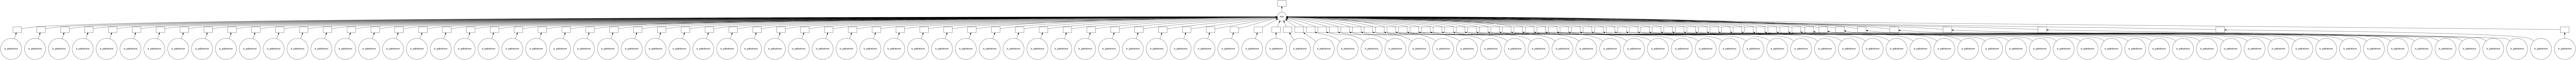

In [28]:
total_da.visualize()

> Click on the image to zoom in

In [30]:
%%time
result = total_da.compute()
result

[########################################] | 100% Completed | 123.09 ms
CPU times: user 66.9 ms, sys: 7.74 ms, total: 74.6 ms
Wall time: 129 ms


40

If we use Dask Bag, we will do the same computations faster:

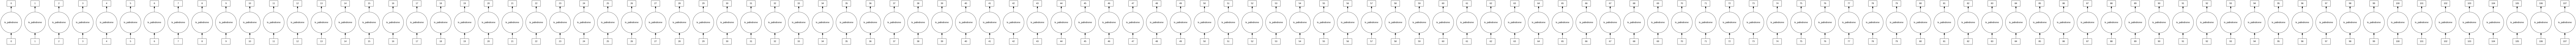

In [31]:
import dask.bag as db
bag = db.from_sequence(list_words)
bag.map(is_palindrome).visualize()

In [33]:
%time
result= sum(bag.map(is_palindrome).compute())
result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
[########################################] | 100% Completed | 847.42 ms


40

**<font color="red">Important Lessons</font>**

- The `delayed` decorator adds overhead.
- It is good not to use it when a task requires a little amount of time.
- Call `delayed` on the function not the result.
- Break up computations into many pieces. You achieve parallelism by having many delayed calls, not by using only a single one: Dask will not look inside a function decorated with `delayed` and parallelize that code internally.

### Exercise 2

Use Dask to parallelize the code below (calculations of `pi`):

In [34]:
%%time

import random

def approximate_pi(num_samples):
    num_points_circ = 0

    for i in range(num_samples):
        # Select an arbitrary point in [-1,1]x[-1,1]
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Check if the point is inside the circle
        if x**2 + y**2 < 1.0:
            num_points_circ += 1

    return 4 * num_points_circ / num_samples

def mean(*args):
    return sum(args) / len(args)

number_samples = 10**6
number_experiments = 10

pi_approx = mean(*[approximate_pi(number_samples) for i in range(number_experiments)])

print("Approximation of Pi: {}".format(pi_approx))

Approximation of Pi: 3.1415928000000006
CPU times: user 8.21 s, sys: 8.21 ms, total: 8.22 s
Wall time: 8.26 s


<p>
<p>
<details><summary><b>Click here to access the solution</b></summary>
<p>


```python
number_samples = 10**6
number_experiments = 10

pi_approx = dask.delayed(mean)(*[dask.delayed(approximate_pi)(number_samples) for i in range(number_experiments)])

print("Approximation of Pi: {}".format(pi_approx.compute()))
```

</p>

# <font color="red"> Dask Array</font>

- Dask arrays coordinate many Numpy arrays, arranged into chunks within a grid. 
    - _Parallel_: Uses all of the cores on your computer
    - _Larger-than-memory_: Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
    - _Blocked Algorithms_: Perform large computations by performing many smaller computations
- They support a large subset of the Numpy API.

![fig_array](https://miro.medium.com/max/1388/1*JfQnXJ5_R104bPyE8_XhwQ.png)

**Create a Dask Array**

- Create a 20000x20000 array of random numbers, represented as many numpy arrays of size 1000x1000 (or smaller if the array cannot be divided evenly). 
- There are 400 (20x20) numpy arrays of size 1000x1000.

In [35]:
x = da.random.random((10000, 40000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 40000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

The array:
- Has 2.98 Gb
- Is organized in 400 chunks of `1000x1000` Numpy arrays.
- Each chunk has 7.64 Mb

Similar information can be obtained from:

In [36]:
print(f"     Type: {type(x)}")
print(f"    Shape: {x.shape}")
print(f"     Size: {x.size}")
print(f"Num bytes: {x.nbytes} B or {convert_size(x.nbytes)}")
print(f"   Chunks: {x.chunks}")

     Type: <class 'dask.array.core.Array'>
    Shape: (10000, 40000)
     Size: 400000000
Num bytes: 3200000000 B or 2.98 GB
   Chunks: ((1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000), (1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000))


We can use Numpy syntax:

In [37]:
y = 2.0 + x.T
y.shape

(40000, 10000)

In [38]:
mu = x.mean(axis=0)
mu

dask.array<mean_agg-aggregate, shape=(40000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>

In [39]:
z = y[::2, 5000:].mean(axis=1)
z

dask.array<mean_agg-aggregate, shape=(20000,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

In [ ]:
z.visualize(rankdir="LR")

Use the **`compute()`** function if you want your result as a NumPy array.

In [41]:
mu[0].compute()

[########################################] | 100% Completed | 211.21 ms


0.4933147015639942

In [42]:
w = z.compute()
print(type(w), w.shape )

[########################################] | 100% Completed | 3.24 s
<class 'numpy.ndarray'> (20000,)


**Persit Data in Memory**

- If you have the available RAM for your dataset then you can persist data in memory.
- This allows future computations to be much faster.

In [43]:
%time y.sum().compute()

[########################################] | 100% Completed | 7.14 s
CPU times: user 9.4 s, sys: 169 ms, total: 9.57 s
Wall time: 7.19 s


1000001672.9581037

In [44]:
y = y.persist()

[########################################] | 100% Completed | 7.02 s


In [45]:
%time y[0, 0].compute()

[########################################] | 100% Completed | 104.41 ms
CPU times: user 10.4 ms, sys: 884 µs, total: 11.2 ms
Wall time: 111 ms


2.7598975242786485

In [46]:
%time y.sum().compute()

[########################################] | 100% Completed | 1.74 s
CPU times: user 1.41 s, sys: 67.3 ms, total: 1.48 s
Wall time: 1.82 s


1000001672.9581037

**Numpy against Dask**

In [47]:
def f_numpy():
    x = np.random.normal(10, 0.1, size=(20000, 20000)) 
    y = x.mean(axis=0)[::100]

`%%memit` 

- Measures the memory use of a single statement.
- Provides the peak memory and incremental memory growth 

In [48]:
%%memit
f_numpy()

peak memory: 6301.41 MiB, increment: 3051.84 MiB


In [49]:
%%time
f_numpy()

CPU times: user 14.4 s, sys: 1.08 s, total: 15.4 s
Wall time: 15.5 s


In [50]:
def f_dask():
    x = da.random.normal(10, 0.1, size=(20000, 20000), 
                         chunks=(1000, 1000))
    y = x.mean(axis=0)[::100].compute() 

In [51]:
%%memit
f_dask()

[########################################] | 100% Completed | 14.33 s
peak memory: 3266.15 MiB, increment: 16.48 MiB


In [52]:
%%time
f_dask()

[########################################] | 100% Completed | 14.06 s
CPU times: user 22.4 s, sys: 161 ms, total: 22.5 s
Wall time: 14.1 s


Reshapping the chunk size might provide a better performance:

In [53]:
def f_dask2():
    x = da.random.normal(10, 0.1, size=(20000, 20000), 
                         chunks=(2000, 500))
    y = x.mean(axis=0)[::100].compute() 

In [54]:
%%time
f_dask2()

[########################################] | 100% Completed | 14.01 s
CPU times: user 22.3 s, sys: 202 ms, total: 22.5 s
Wall time: 14.1 s


**Dask finished faster, but used more total CPU time because Dask was able to transparently parallelize the computation because of the chunk size.**

**<font color="red">Things to Consider</font>**

- If your data fits in RAM and you are not performance bound, then using NumPy might be the right choice. Dask adds another layer of complexity which may get in the way.
- **If you are just looking for speedups rather than scalability then you may want to consider using Numba for manipulating Numpy arrays.**
- How to select the chunk size?
     - Too small: huge overheads.
     - Poorly aligned with data: inefficient reading.
     - Recommended to have a chuck size of at least 100 Mb.
     - Choose a chunk size that is large in order to reduce the number of chunks that Dask has to think about (which affects overhead) but also small enough so that many of them can fit in memory at once. Dask will often have as many chunks in memory as twice the number of active threads.
   

**Avoid Oversubscribing Threads**
     
- By default Dask will run as many concurrent tasks as you have logical cores. 
- It assumes that each task will consume about one core.
- Many array-computing libraries (used in Dask) are themselves multi-threaded, which can cause contention and low performance.
- For better performance, we need to explicitly specify the use of one thread:

```bash
   export OMP_NUM_THREADS=1
   export MKL_NUM_THREADS=1
   export OPENBLAS_NUM_THREADS=1
```

## <font color="red">Memory Profiling</font>

- We use the `memory_profiler` package to track memory usage.
- It's written totally in python and monitors process which is running python code as well as line by line memory usage by code. 
- We use the `memory_usage()` and pass the parameter `interval` for the frequency of measuring the memory usage.

[########################################] | 100% Completed | 524.92 ms


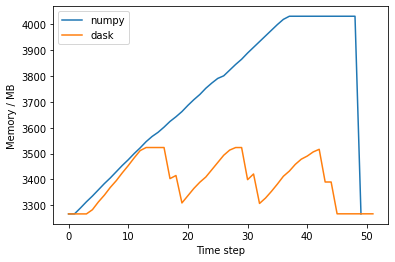

In [55]:
def sum_with_numpy():
    # Serial implementation
    np.arange(10**8).sum()

def sum_with_dask():
    # Parallel implementation
    work = da.arange(10**8).sum()
    work.compute()

memory_numpy = memory_usage(sum_with_numpy, interval=0.01)
memory_dask = memory_usage(sum_with_dask, interval=0.01)

# Plot results
plt.plot(memory_numpy, label='numpy')
plt.plot(memory_dask, label='dask')
plt.xlabel('Time step')
plt.ylabel('Memory / MB')
plt.legend(loc='best')
plt.show()

You also use Dask profiling options:

In [56]:
from dask.diagnostics import Profiler, ResourceProfiler
work = da.arange(10**8).sum()
with Profiler() as prof, ResourceProfiler(dt=0.001) as rprof:
    result2 = work.compute()

from bokeh.plotting import output_notebook
from dask.diagnostics import visualize
visualize([prof,rprof], output_notebook())

[########################################] | 100% Completed | 536.59 ms


Column(id='1140', ...)

In [57]:
with ResourceProfiler(dt=0.001) as rprof2:
    result = np.arange(10**8).sum()
visualize([rprof2], output_notebook())

Figure(id='1281', ...)

# <font color="red"> Dask DataFrames</font>

- Pandas is great for tabular datasets that fit in memory. 
- Dask becomes useful when the dataset you want to analyze is larger than your machine's RAM. 
- Dask DataFrames:
     - Coordinate many Pandas DataFrames, partitioned along an index. 
     - Support a large subset of the Pandas API.
- One operation on a Dask DataFrame triggers many Pandas operations on the constituent pandas DataFrames in a way that is mindful of potential parallelism and memory constraints.
- Some of the operations that are really fast if you use Dask Dataframes:
     - Arithmetic operations (multiplying or adding to a Series)
     - Common aggregations (`mean`, `min`, `max`, `sum`, etc.)
     - Calling `apply`
     - Calling `value_counts()`, `drop_duplicates()` or `corr()`
     - Filtering with `loc`, `isin`, and row-wise selection

![fig_df](https://pythondata.com/wp-content/uploads/2016/11/Screen-Shot-2016-11-24-at-6.52.24-PM-168x300.png)

### <font color="green"> NYC Flights Dataset</font>

Data is specific to flights (in 1990's) out of the three airports in the New York City area.

Download the remote data:

In [58]:
import urllib.request

print("\t Downloading NYC dataset...", end="\n", flush=True)

url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, header = urllib.request.urlretrieve(url, "nycflights.tar.gz")

print("\t Done!", flush=True)

	 Done!


In [59]:
!ls -lrt

total 46824
drwxr-xr-x 1 root root     4096 Mar 21 22:54 sample_data
-rw-r--r-- 1 root root  3817882 Mar 22 19:41 mydask.png
-rw-r--r-- 1 root root 44120091 Mar 22 19:43 nycflights.tar.gz


Extract the `.csv` files from the tar file:

In [60]:
import tarfile

with tarfile.open(filename, mode="r:gz") as flights:
     flights.extractall("data/")

In [61]:
!ls -lrt data/nycflights

total 229592
-rw-r--r-- 1 502 staff 22611683 Jun 29  2017 1990.csv
-rw-r--r-- 1 502 staff 21535597 Jun 29  2017 1991.csv
-rw-r--r-- 1 502 staff 21783667 Jun 29  2017 1992.csv
-rw-r--r-- 1 502 staff 21495608 Jun 29  2017 1993.csv
-rw-r--r-- 1 502 staff 21696030 Jun 29  2017 1994.csv
-rw-r--r-- 1 502 staff 25170054 Jun 29  2017 1995.csv
-rw-r--r-- 1 502 staff 24979433 Jun 29  2017 1996.csv
-rw-r--r-- 1 502 staff 24952545 Jun 29  2017 1997.csv
-rw-r--r-- 1 502 staff 24903801 Jun 29  2017 1998.csv
-rw-r--r-- 1 502 staff 25952466 Jun 29  2017 1999.csv


Read all the files at once:

In [62]:
import os

df = dd.read_csv(os.path.join("data", "nycflights", "*.csv"), 
                parse_dates={"Date": [0, 1, 2]})
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


- The representation of the dataframe object contains no data. 
- `pandas.read_csv` reads in the entire file before inferring datatypes.
- `dask.dataframe.read_csv` only reads in a sample from the beginning of the file (or first file). These inferred datatypes are then enforced when reading all partitions.

We can display the first few rows:

In [63]:
df.head()

[########################################] | 100% Completed | 1.12 s


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


If we display the last few rows, we have a problem:

In [64]:
df.tail()

[                                        ] | 0% Completed | 1.16 s


ValueError: ignored

- There is an issue with the data types of few columns.
- The datatypes inferred in the sample are incorrect.
- We can fix it by reading the files again and specify the appropriate data types.

In [65]:
df = dd.read_csv(os.path.join("data", "nycflights", "*.csv"), 
                parse_dates={"Date": [0, 1, 2]},
                dtype={'TailNum': str,
                       'CRSElapsedTime': float,
                       'Cancelled': bool})

In [66]:
df.tail()

[########################################] | 100% Completed | 1.19 s


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


### <font color="blue">Perform Operations as with `Pandas DataFrames`</font>

**Maximum value of a column**:

- We now want to compute the maximum of the `DepDelay` column.
- With `Pandas`, we would loop over each file to find the individual maximums, then find the final maximum over all the individual maximums.
- `dask.dataframe` allows us to write pandas-like code that operates on large than memory datasets in parallel.

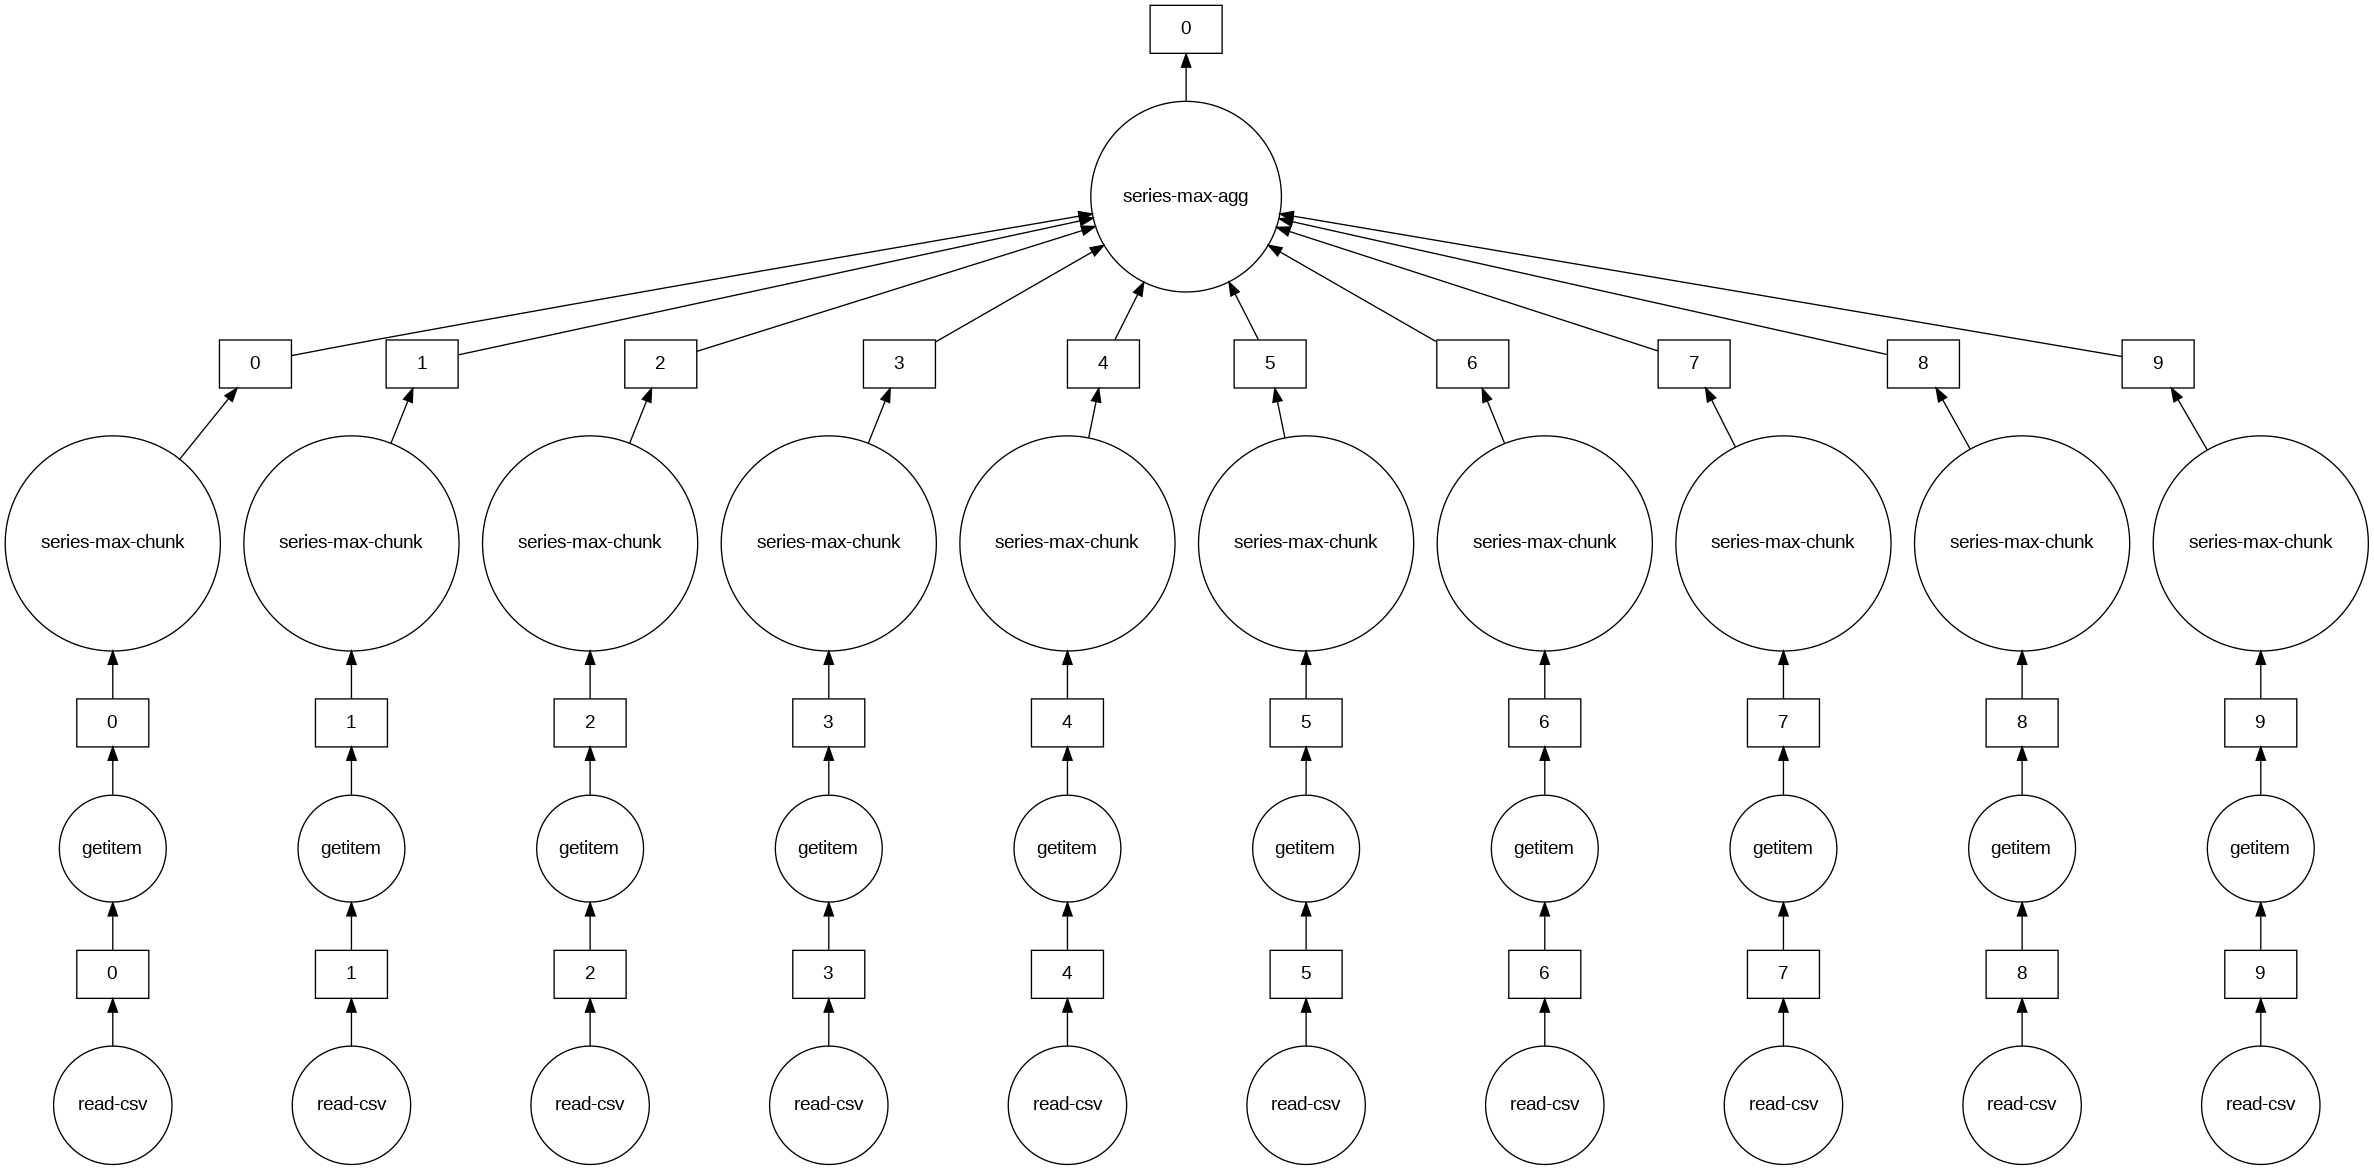

In [67]:
df.DepDelay.max().visualize()

In [68]:
%time df.DepDelay.max().compute()

[########################################] | 100% Completed | 8.37 s
CPU times: user 11.6 s, sys: 709 ms, total: 12.3 s
Wall time: 8.4 s


1435.0

If we do the same thing in `Pandas`, we will have:

In [69]:
%%time

import glob

list_files = glob.glob("data/nycflights/*csv")
   
maxes = list()
for file_name in list_files:
    pddf = pd.read_csv(file_name)
    maxes.append(pddf.DepDelay.max())

final_max = max(maxes)

print("Final Maximum: ", max(maxes))

Final Maximum:  1435.0
CPU times: user 7.76 s, sys: 258 ms, total: 8.02 s
Wall time: 8.13 s


**Plotting**

[########################################] | 100% Completed | 9.23 s


<Axes: xlabel='DayOfWeek', ylabel='DepDelay'>

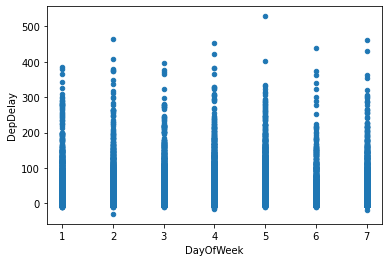

In [70]:
df[df.Dest == 'PIT'].compute().plot(kind='scatter', 
                                    x="DayOfWeek", 
                                    y="DepDelay")

**Other Operations**

Number of non-cancelled flights:

In [71]:
len(df[~df.Cancelled])

[########################################] | 100% Completed | 8.26 s


2540961

Number of non-cancelled flights were taken from each airport:

In [72]:
df[~df.Cancelled].groupby('Origin').Origin.count().compute()

[########################################] | 100% Completed | 9.82 s


Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Origin, dtype: int64

Average departure delay from each airport:

In [73]:
df.groupby("DayOfWeek").DepDelay.mean().compute()

[########################################] | 100% Completed | 9.58 s


DayOfWeek
1     8.096565
2     8.149109
3     9.141912
4    10.538275
5    11.476687
6     7.824071
7     8.994296
Name: DepDelay, dtype: float64

Group by destinations and count:

In [74]:
df.groupby("Dest").count().compute()

[########################################] | 100% Completed | 9.56 s


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,,,,,
ABE,111,111,101,111,101,111,111,111,0,101,111,0,101,101,111,111,0,0,111,111
ALB,998,998,943,998,942,998,998,998,0,942,998,0,942,943,998,998,0,0,998,998
ATL,132372,132372,128855,132372,128605,132372,132372,132372,78183,128605,132372,75553,128605,128855,132372,132372,78183,78183,132372,132372
BDL,6208,6208,6071,6208,6067,6208,6208,6208,354,6067,6208,350,6067,6071,6208,6208,354,354,6208,6208
BGR,516,516,504,516,503,516,516,516,0,503,516,0,503,504,516,516,0,0,516,516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUS,787,787,776,787,775,787,787,787,787,775,787,775,775,776,787,787,787,787,787,787
CRP,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
HNL,569,569,569,569,563,569,569,569,569,563,569,563,563,569,569,569,569,569,569,569


In [75]:
df.groupby("Dest")["ArrDelay"].mean().compute()

[########################################] | 100% Completed | 9.58 s


Dest
ABE     4.059406
ALB     4.128450
ATL    10.897796
BDL     3.507664
BGR     9.654076
         ...    
AUS     8.054194
CRP    13.000000
HNL    -1.943162
BHM    -5.151786
TUS   -32.500000
Name: ArrDelay, Length: 99, dtype: float64

In [76]:
df[df.ArrDelay+df.DepDelay>30.0].groupby("Dest").Dest.count().compute()

[########################################] | 100% Completed | 9.84 s


Dest
ABE       23
ALB      134
ATL    27989
BDL      870
BGR      123
       ...  
AUS      195
CRP        1
HNL      103
MTJ        6
BHM       11
Name: Dest, Length: 95, dtype: int64

**Sharing Intermediate Results**

- We sometimes do the same operation more than once. 
- For most operations, `dask.dataframe` hashes the arguments, allowing duplicate computations to be shared, and only computed once.

In [77]:
non_cancelled = df[~df.Cancelled]
mean_delay = non_cancelled.DepDelay.mean()
std_delay = non_cancelled.DepDelay.std()

In [78]:
%%time
mean_delay_res = mean_delay.compute()
std_delay_res = std_delay.compute()

[########################################] | 100% Completed | 9.09 s
[########################################] | 100% Completed | 9.61 s
CPU times: user 24.5 s, sys: 916 ms, total: 25.5 s
Wall time: 18.7 s


We pass both to a single `compute` call:

In [79]:
%%time

mean_delay_res, std_delay_res = da.compute(mean_delay, std_delay)

[########################################] | 100% Completed | 8.19 s
CPU times: user 12 s, sys: 507 ms, total: 12.5 s
Wall time: 8.2 s


The task graphs for both results are merged when calling dask.compute, allowing shared operations to only be done once instead of twice.

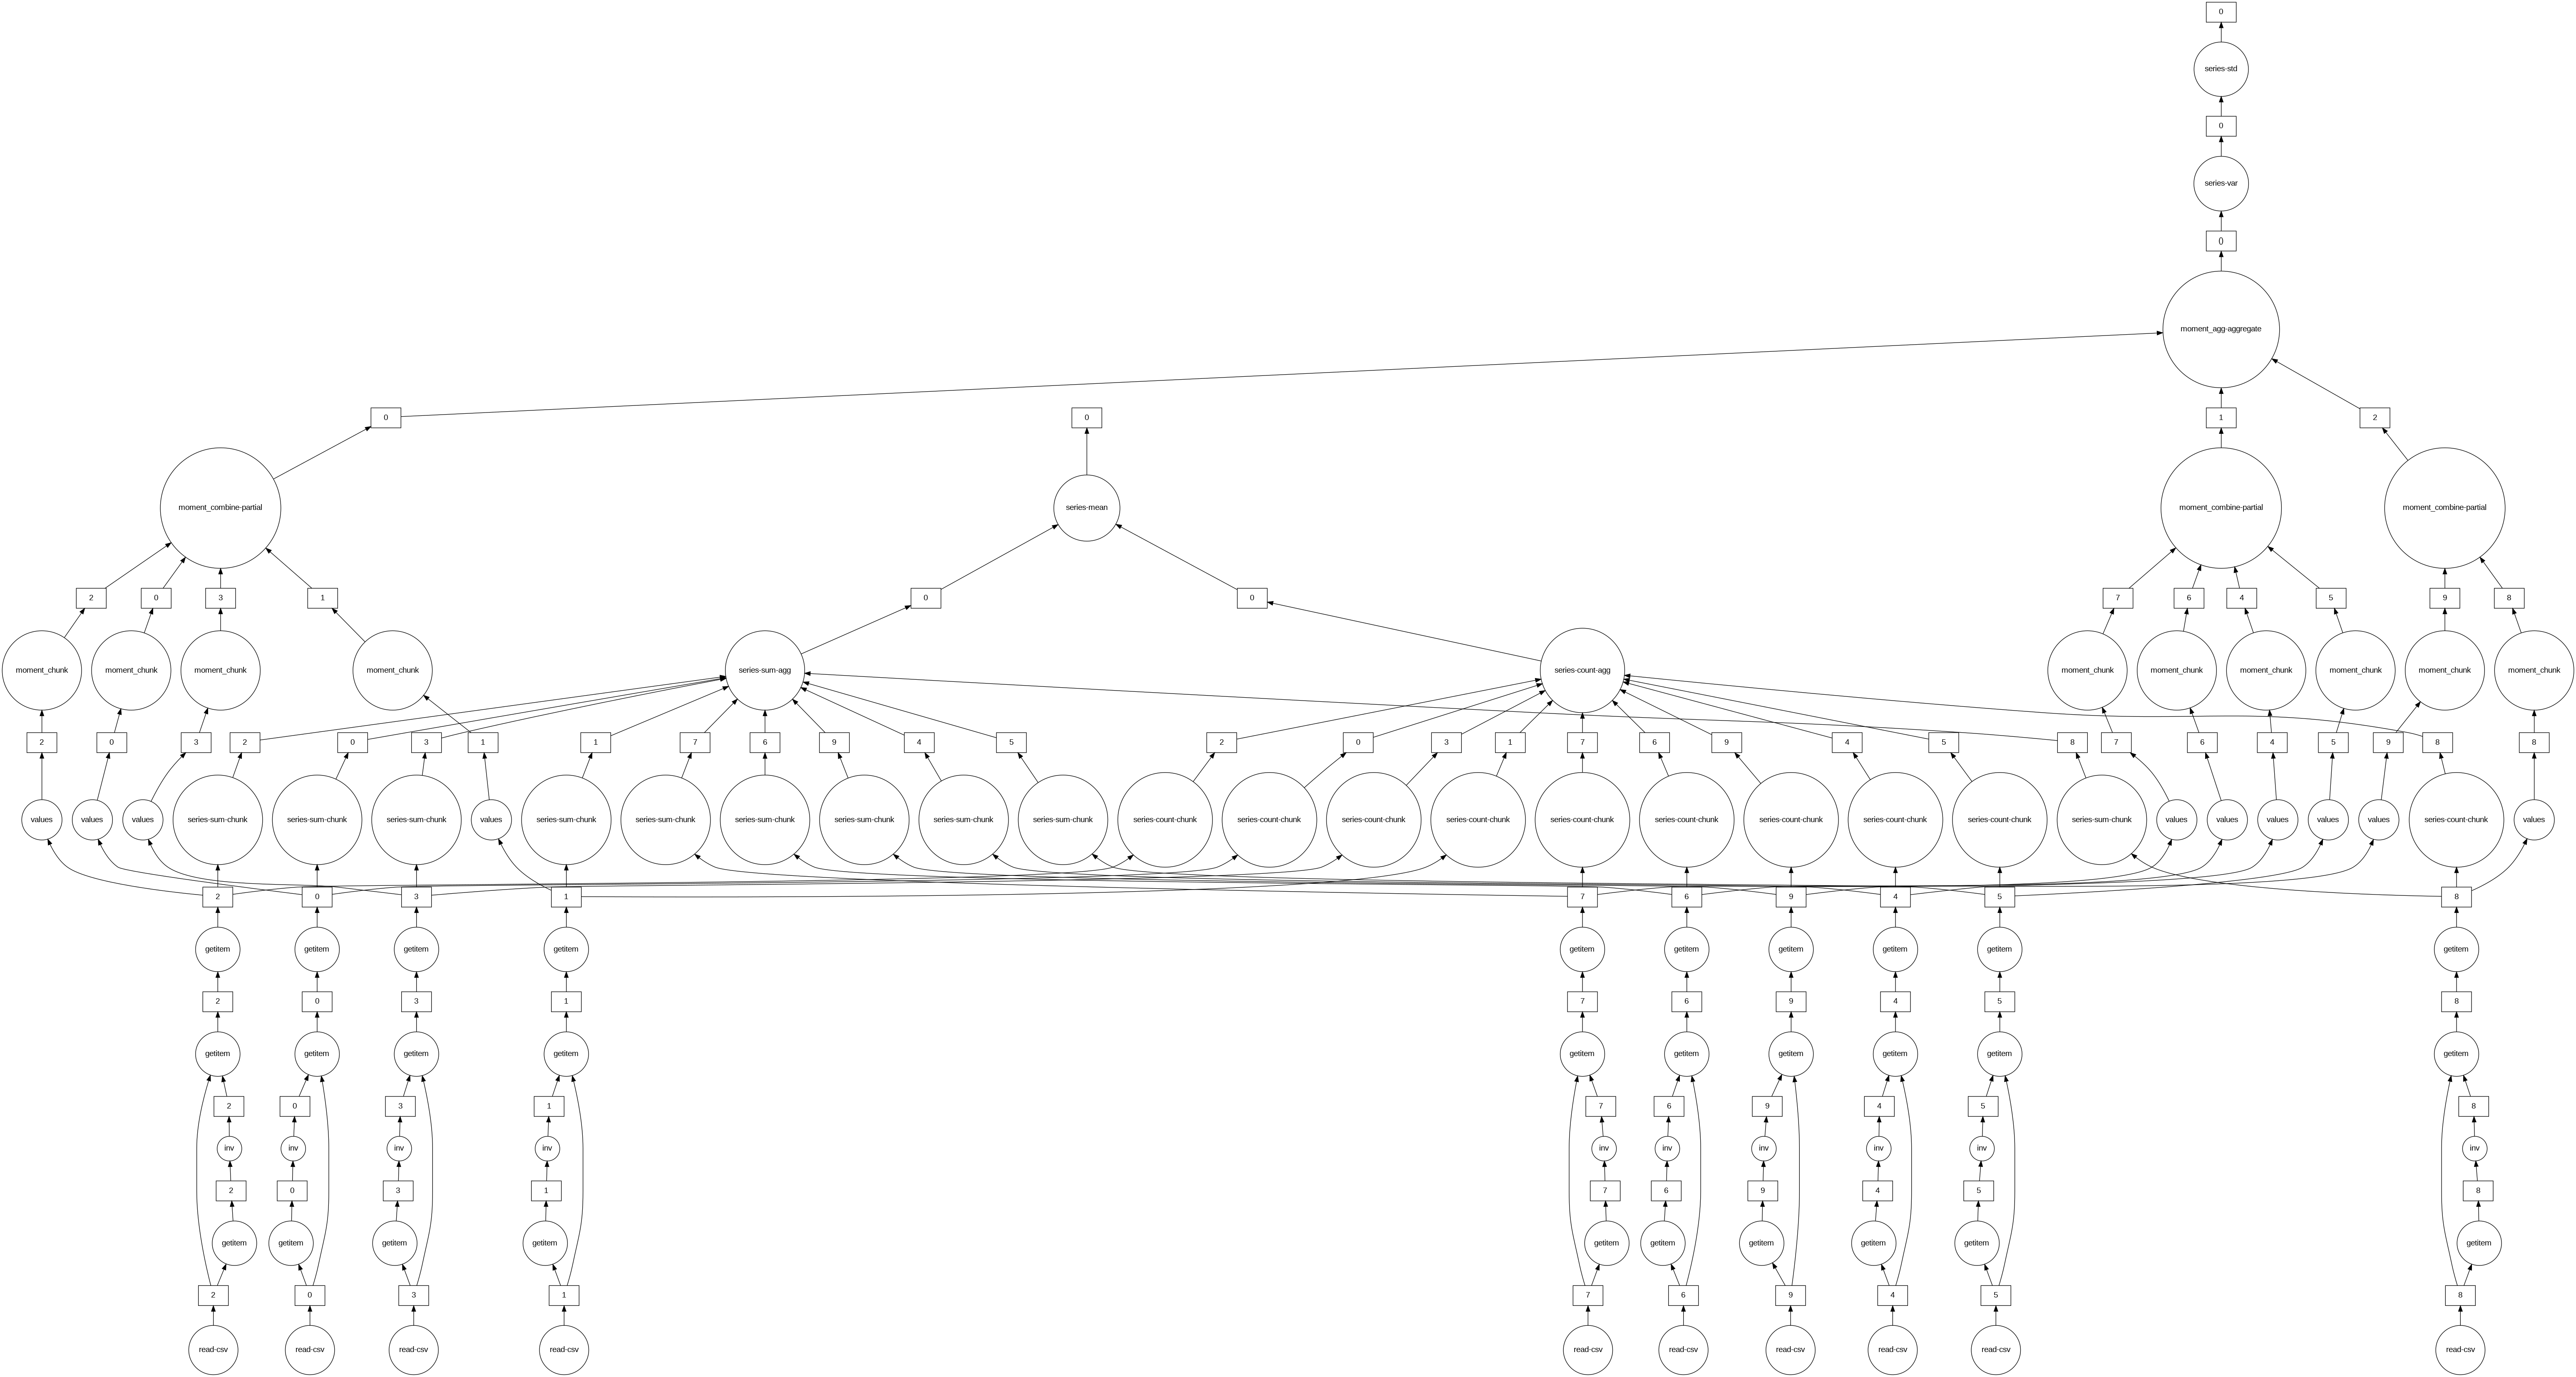

In [80]:
dask.visualize(mean_delay, std_delay)

### Exercise 3

- Consider the code below that computes the mean departure delay per airport. 
- Parallelize the code using Dask.

In [81]:
%%time 

sum_delays = list()
count_delays = list()

for file_name in list_files:
    pddf = pd.read_csv(file_name)
    by_origin = pddf.groupby('Origin')
    loc_total = by_origin.DepDelay.sum()
    loc_count = by_origin.DepDelay.count()
    sum_delays.append(loc_total)
    count_delays.append(loc_count)

total_delays = sum(sum_delays)
n_flights = sum(count_delays)
mean_delays = total_delays / n_flights
print("Mean delays: {}".format(mean_delays))

Mean delays: Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64
CPU times: user 7.8 s, sys: 205 ms, total: 8 s
Wall time: 8.06 s


<p>
<p>

<details><summary><b>Click here to access the solution</b></summary>
<p>


```python
%%time 

df.groupby("Origin")["DepDelay"].mean().compute()
```

</p>
</details>

### <font color="blue">Example of Machine Learning with Dask</font>

Grab columns from the Dask DataFrame:

In [82]:
df_train = df[["CRSDepTime", "CRSArrTime", "Cancelled"]]
df_train

,CRSDepTime,CRSArrTime,Cancelled
npartitions=10,,,
,int64,int64,bool
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


You can query the shape (note delayed # of sample):

In [ ]:
df_train.shape

In [83]:
num_cols = len(df_train.columns)
print(num_cols)

3


**Basic EDA**

We can get descriptive statistics:

In [84]:
df_train.describe().compute()

[########################################] | 100% Completed | 9.91 s


,CRSDepTime,CRSArrTime
count,2.611892e+06,2.611892e+06
mean,1.322913e+03,1.513336e+03
std,4.731965e+02,4.950296e+02
min,0.000000e+00,0.000000e+00
25%,9.200000e+02,1.135000e+03
50%,1.430000e+03,1.546000e+03
75%,1.755000e+03,1.948000e+03
max,2.359000e+03,2.400000e+03


Perform searches and operations on the data:

In [85]:
df_train.isnull().sum().compute()

[########################################] | 100% Completed | 7.53 s


CRSDepTime    0
CRSArrTime    0
Cancelled     0
dtype: int64

**Create the Model**

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(20, 
                       input_dim=num_cols, 
                       activation='relu'))
model.add(layers.Dense(1,  activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="sgd", )

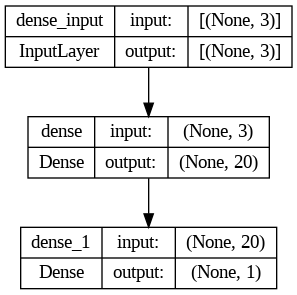

In [87]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

**Train the Model**

Generate batches of data:

In [88]:
def batch_data_generator(df, fraction=0.01):
    while True:
          batch = df.sample(frac=fraction)
          X = batch.iloc[:, :-1]
          y = batch.iloc[:, -1]
          yield (X.compute(), y.compute())

We never run of memory while doing the training:

```
   steps_per_epoch * batch_size = number_of_rows_in_train_data
```

In [89]:
model.fit_generator(generator=batch_data_generator(df_train),
                    steps_per_epoch=100)

[########################################] | 100% Completed | 9.24 s
[########################################] | 100% Completed | 9.06 s
[                                        ] | 0% Completed | 2.53 s

InvalidArgumentError: ignored

[                                        ] | 0% Completed | 3.79 s

# <font color="red"> Task Schedulers</font>

- After Dask generates the task graphs, it needs to execute them on parallel hardware. 
- It is the role of a task scheduler. 
- There are different task schedulers. Each will consume a task graph and compute the same result, but with different performance characteristics.

![schedulers](https://docs.dask.org/en/latest/_images/dask-overview.svg)

Image Source: [https://docs.dask.org/en/latest/](https://docs.dask.org/en/latest/)


Dask networks are composed of three pieces:
- **Centralized scheduler**: Manages workers and assigns the tasks that need to be completed by them.
- **Workers**: Are threads, processes, or separate machines in a cluster. They execute the computations from the computation graph: do the calculations, hold onto results, and communicate results to each other.
- **One or multiple clients**: interact (Jupyter noteboooks or scripts) with users and submit work to the scheduler for execution on the workers.


![networks](https://miro.medium.com/max/700/0*9JHQAjTVoKbm2f4X.png)
Image Source: [Steven Gon](https://gongster.medium.com/dask-an-introduction-and-tutorial-b42f901bcff5)

To execute the task graphs there are two types of schedulers:
* **Single machine**: Provides basic features on a local process or thread pool. It is simple and cheap to use, although it can only be used on a single machine and does not scale
* **Distributed**: Offers more features, but also requires a bit more effort to set up. It can run locally or distributed across a cluster.

## <font color="blue"> Single Machine Scheduler</font>

Consider the following example:

In [90]:
n = 10
data = [i+1 for i in range(n)]

out = list()
for x in data:
    y = dask.delayed(increment)(x)
    z = dask.delayed(double)(y)
    out.append(z)
    
totald = 0
for z in out:
    totald = dask.delayed(add)(totald, z)

[########################                ] | 60% Completed | 8.26 s

**Single thread**

- The single-threaded synchronous scheduler executes all computations in the local thread with no parallelism at all.
- It is useful for debugging or profiling.

In [91]:
%time totald.compute(scheduler='synchronous')

[########################################] | 100% Completed | 8.36 s
CPU times: user 11.7 s, sys: 627 ms, total: 12.3 s
Wall time: 30.1 s


130

**Local threads**

Uses `multiprocessing.pool.ThreadPool`

Use all the processors

In [92]:
%time totald.compute(scheduler='threads')

CPU times: user 113 ms, sys: 10.8 ms, total: 124 ms
Wall time: 16 s


130

Use some of the processors:

In [93]:
%time totald.compute(scheduler='threads', num_workers=2)

CPU times: user 119 ms, sys: 12.5 ms, total: 131 ms
Wall time: 16 s


130

We can choose to use a single thread:

In [94]:
%time totald.compute(scheduler='single-threaded')

CPU times: user 209 ms, sys: 21.2 ms, total: 230 ms
Wall time: 30 s


130

**Local processes**

- The multiprocessing scheduler executes computations with a local `multiprocessing.Pool`.
- Every task and all of its dependencies are shipped to a local process, executed, and then their result is shipped back to the main process. 
- Moving data to remote processes and back can introduce performance penalties, particularly when the data being transferred between processes is large. 
- The multiprocessing scheduler is an excellent choice when workflows are relatively linear, and so does not involve significant inter-task data transfer as well as when inputs and outputs are both small, like filenames and counts.

In [95]:
import multiprocessing
print (multiprocessing.cpu_count())

2


Use all the processors:

In [96]:
%time result = totald.compute(scheduler='processes')

CPU times: user 182 ms, sys: 147 ms, total: 329 ms
Wall time: 22.9 s


Use some of the processors:

In [97]:
%time result = totald.compute(scheduler='processes', num_workers=2)

CPU times: user 186 ms, sys: 122 ms, total: 308 ms
Wall time: 22.5 s


In [98]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [99]:
result = totald.compute(scheduler='processes', num_workers=2)

[########################################] | 100% Completed | 22.61 s


### Threads or Processes?

- **Use the threaded scheduler** if your computation is dominated by non-Python code, as is primarily the case when operating on numeric data in NumPy arrays, Pandas DataFrames, or using any of the other C/C++/Cython based projects in the ecosystem.
   - It is lightweight.
   - Little overhead.
   - Tranferring data between tasks not expensives because everything happens in the same process.
- **Use the multipeocessing scheduler** if your computation is dominated by processing pure Python objects like strings, dictionaries, or lists.
   - It is lightweight.
   - Every task and all of its dependencies are shipped to a local process, executed, and then their result is shipped back to the main process.
   - Moving data to remote processes and back can introduce performance penalties, particularly when the data being transferred between processes is large. 
   - Is an excellent choice when workflows are relatively linear, and so does not involve significant inter-task data transfer as well as when inputs and outputs are both small, like filenames and counts.

## <font color="blue">Distributed Scheduler</font>

- The Dask distributed scheduler can either be setup on a cluster or run locally on a personal machine. 
- It is a centrally managed, distributed, dynamic task scheduler. 
     - The central dask-scheduler process coordinates the actions of several dask-worker processes spread across multiple machines and the concurrent requests of several clients.
     - The scheduler is asynchronous and event-driven, simultaneously responding to requests for computation from multiple clients and tracking the progress of multiple workers.
     - The event-driven and asynchronous nature makes it flexible to concurrently handle a variety of workloads coming from multiple users at the same time while also handling a fluid worker population with failures and additions. 
     - Workers communicate amongst each other for bulk data transfer over TCP.
- To set up `dask.distributed`, we need to create a client instance by calling `Client` class from `dask.distributed`. 
- It will internally create a dask scheduler and dask workers. 
- We will get the **link of the dashboard** where we can analyze tasks running in parallel. 
- We can pass a number of workers (using the `n_workers` argument) and threads to use per worker process (using the `threads_per_worker` argument).
- As soon as you create a client, Dask will automatically start using it.

In [100]:
from dask.distributed import Client
client = Client()
client = Client(n_workers=3, threads_per_worker=4)
client.cluster

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45475
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35907'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32941'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36335', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36335
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45882
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45271', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45271
INFO:distributed.core:Startin

If you aren’t in jupyterlab and using the `dask-labextension`, you can  click the `Dashboard` link to open up the diagnostics dashboard.

In [101]:
import random

def random_slow_add(x, y):
    time.sleep(random.randrange(3,10))
    return x + y

In [102]:
results = list()

for x in data:
    y = dask.delayed(random_slow_add)(x, 1)
    results.append(y)
    
total = dask.delayed(sum)(results)

In [103]:
%time result = total.compute()
result

CPU times: user 1.84 s, sys: 207 ms, total: 2.04 s
Wall time: 9.18 s


65

Shut down the cluster:

In [104]:
client.close()

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40191'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37073'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34597'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:59182; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:59196; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:36195', name: 0, status: closing, memory: 0, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:36195
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:41641', name: 1, status: closing, memory: 0, processing: 0>
INFO:distributed.core:Removing comms

**<font color="red">Things to Consider</font>**

- Each Dask task has overhead (about 1 ms). If you have a lot tasks this overhead can add up. It is a good idea to give each task more than a few seconds of work.
- To better understand how your program is performing, check the [Dask Performance Diagnostics](https://distributed.dask.org/en/latest/diagnosing-performance.html) documentation. You can also view the [video](https://docs.dask.org/en/stable/diagnostics-distributed.html) to find out how to group your work into fewer, more substantial tasks. This might mean that you call lazy operations at once instead of individually. This might also repartitioning your dataframe(s).
- A good rule of thumb for choosing number of threads per Dask worker is to choose the square root of the number of cores per node. 
     - In general more threads per worker are good for a program that spends most of its time in NumPy, SciPy, Numba, etc., and fewer threads per worker are better for simpler programs that spend most of their time in the Python interpreter.
- The Dask scheduler runs on a single thread, so assigning it its own node is a waste.
- There is no hard limit on Dask scaling. The task overhead though will eventually start to swamp your calculation depending on how long each task takes to compute. 

## <font color="blue"> Example with DataFrame</font>

Build a Pandas DataFrame with 100000 rows and two columns with values selected randomly between 1 and 1000.

In [105]:
num_rows = 100000
df = pd.DataFrame({'X':np.random.randint(1000, size=num_rows),
                   'Y':np.random.randint(1000, size=num_rows)})
df

,X,Y
0,166,928
1,154,22
2,782,848
3,620,819
4,214,209
...,...,...
99995,479,357
99996,218,310
99997,780,837
99998,979,474


Write a function that computes the sum of square for each column of the DataFrame.

In [106]:
def add_squares(df):
    return df.X**2 + df.Y**2

Measure the time it takes to call the function:

In [107]:
%%timeit
df['add_squares'] = df.apply(add_squares,axis=1)

3.07 s ± 832 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
df

,X,Y,add_squares
0,166,928,888740
1,154,22,24200
2,782,848,1330628
3,620,819,1055161
4,214,209,89477
...,...,...,...
99995,479,357,356890
99996,218,310,143624
99997,780,837,1308969
99998,979,474,1183117


### <font color="green">Parallelize using Dask `Map_Partition`</font>

We construct a Dask DataFrame from pandas dataframe using `from_pandas` function and specify the number of partitions (`nparitions`) to break this dataframe into.

```python
   dd = ddf.from_pandas(df, npartitions=N)
```

`ddf` is the name you imported Dask Dataframes with, and `npartitions` is an argument telling the Dataframe how you want to partition it.

Each partition will run on a different thread, and communication between them will become too costly if there are too many.

We will break into 4 partitions (number of available cores):

In [109]:
ddf = dd.from_pandas(df, npartitions=4)

We will apply `add_squares` method on each of these partitions:

In [110]:
%%time

ddf['z'] = ddf.map_partitions(add_squares, 
                               meta=(None, 'int64')).compute()

CPU times: user 278 ms, sys: 31.7 ms, total: 309 ms
Wall time: 1.81 s


In [111]:
def myfunc(x, y):
    return y * (x**2 + 1)

In [112]:
%%time

df1 = df.apply(lambda row: myfunc(row.X, row.Y), axis=1)

CPU times: user 2.3 s, sys: 54.3 ms, total: 2.35 s
Wall time: 2.45 s


In [113]:
import multiprocessing
ddf = dd.from_pandas(df, npartitions=4*multiprocessing.cpu_count())
ddf

,X,Y,add_squares
npartitions=8,,,
0,int64,int64,int64
12500,...,...,...
...,...,...,...
87500,...,...,...
99999,...,...,...


In [114]:
%%time

ddfz = ddf.map_partitions(lambda data: 
                              data.apply(lambda row: myfunc(row.X, row.Y), axis=1)).compute(scheduler='processes')

[########################################] | 100% Completed | 4.98 s
CPU times: user 676 ms, sys: 198 ms, total: 874 ms
Wall time: 5.39 s
